# Example Q2: Save and Loading Channel Library Versions
This example notebook shows how one may save and load versions of the channel library.

© Raytheon BBN Technologies 2018

### Saving Channel Library Versions

We initialize the channel library as shown in tutorial *Q1*:

In [1]:
from QGL import *

cl = ChannelLibrary(":memory:")
q1 = cl.new_qubit("q1")
aps2_1 = cl.new_APS2("BBNAPS1", address="192.168.5.101") 
aps2_2 = cl.new_APS2("BBNAPS2", address="192.168.5.102")
dig_1  = cl.new_X6("X6_1", address=0)
h1 = cl.new_source("Holz1", "HolzworthHS9000", "HS9004A-009-1", power=-30)
h2 = cl.new_source("Holz2", "HolzworthHS9000", "HS9004A-009-2", power=-30) 
cl.set_control(q1, aps2_1, generator=h1)
cl.set_measure(q1, aps2_2, dig_1.ch(1), generator=h2)
cl.set_master(aps2_1, aps2_1.ch("m2"))
cl["q1"].measure_chan.frequency = 0e6
cl.commit()

Let us save this channel library for posterity:

In [2]:
cl.save_as("NoSidebanding")

Now we adjust some parameters and save another version of the channel library

In [3]:
cl["q1"].measure_chan.frequency = 50e6
cl.commit()
cl.save_as("50MHz-Sidebanding")

Maybe we forgot to change something. No worries! We can just update the parameter and create a new copy.

In [4]:
cl["q1"].pulse_params['length'] = 400e-9
cl.commit()
cl.save_as("50MHz-Sidebanding")
cl.ls()

id,Year,Date,Time,Name,Notes
4,2021,Apr. 14,05:48:09 PM,50MHz-Sidebanding,
3,2021,Apr. 14,05:48:09 PM,50MHz-Sidebanding,
2,2021,Apr. 14,05:48:09 PM,NoSidebanding,
1,2021,Apr. 14,05:48:09 PM,working,None


We see the various versions of the channel library here. Note that the user is *always* modifying the working version of the database: all other versions are archival, but they can be *restored* to the current working version as shown below.

### Loading Channel Library Versions

Let us load a previous version of the channel library, noting that the former value of our parameter is restored in the working copy. **CRUCIAL POINT**: do not use the old reference `q1`, which is no longer pointing to the database since the working db has been replaced with the saved version. Instead use dictionary access `cl["q1"]` on the channel library to return the first qubit: 

In [5]:
cl.load("NoSidebanding")
cl["q1"].measure_chan.frequency

0.0

Now let's load the *second oldest* version of the 50MHz-sidebanding library:

In [6]:
cl.load("50MHz-Sidebanding", -1)
cl["q1"].pulse_params['length'], cl["q1"].measure_chan.frequency

(4e-07, 50000000.0)

In [7]:
# q1 = QubitFactory("q1")
plot_pulse_files(RabiAmp(cl["q1"], np.linspace(-1, 1, 11)), time=True)

Compiled 11 sequences.


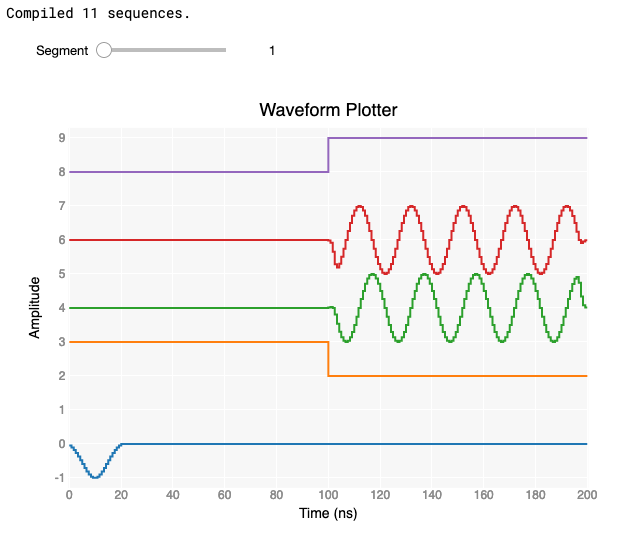

In [8]:
cl.ls()

id,Year,Date,Time,Name,Notes
5,2021,Apr. 14,05:48:09 PM,working,
4,2021,Apr. 14,05:48:09 PM,50MHz-Sidebanding,
3,2021,Apr. 14,05:48:09 PM,50MHz-Sidebanding,
2,2021,Apr. 14,05:48:09 PM,NoSidebanding,


In [9]:
cl.rm("NoSidebanding")

In [10]:
cl.ls()

id,Year,Date,Time,Name,Notes
5,2021,Apr. 14,05:48:09 PM,working,
4,2021,Apr. 14,05:48:09 PM,50MHz-Sidebanding,
3,2021,Apr. 14,05:48:09 PM,50MHz-Sidebanding,


In [11]:
cl.rm("50MHz-Sidebanding")

In [12]:
cl.ls()

id,Year,Date,Time,Name,Notes
5,2021,Apr. 14,05:48:09 PM,working,
